# Scrape Data by Year

https://github.com/AllenDowney/ThinkBayes2

In [63]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import numpy as np
import statistics

import math
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
url = "https://www.fangraphs.com/teams/cardinals/schedule?season=2019"

In [9]:
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page,'html')
table = soup.find('div', {'class': 'team-schedule-table'}) #store table

In [26]:
header = []
for row in table.find_all('th'):
    h = row.text.strip()
    header.append(h)
    
header

['Date',
 '',
 'Opp',
 'STLWin Prob',
 'W/L',
 'STLRuns',
 'OppRuns',
 'STL Starter',
 'Opp Starter']

In [23]:
header = [row.text.strip().split('\n') for row in table.find_all('th')]
header

[['Date'],
 [''],
 ['Opp'],
 ['STLWin Prob'],
 ['W/L'],
 ['STLRuns'],
 ['OppRuns'],
 ['STL Starter'],
 ['Opp Starter']]

In [28]:
table_rows = table.find_all('tr')
table_rows

data = []
for row in table_rows:
    cols = row.find_all('td')
    cols = [ele.text for ele in cols]
    data.append(cols)

data = data[1:]
data

[['Mar 28, 20193/28',
  'at',
  'MIL',
  '49.8%',
  'L',
  '4',
  '5',
  'Miles Mikolas',
  'Jhoulys Chacin'],
 ['Mar 29, 20193/29',
  'at',
  'MIL',
  '48.8%',
  'W',
  '9',
  '5',
  'Jack Flaherty',
  'Freddy Peralta'],
 ['Mar 30, 20193/30',
  'at',
  'MIL',
  '45.9%',
  'L',
  '2',
  '4',
  'Dakota Hudson',
  'Brandon Woodruff'],
 ['Mar 31, 20193/31',
  'at',
  'MIL',
  '46.0%',
  'L',
  '4',
  '5',
  'Michael Wacha',
  'Corbin Burnes'],
 ['Apr 1, 20194/1',
  'at',
  'PIT',
  '43.9%',
  'W',
  '6',
  '5',
  'Adam Wainwright',
  'Chris Archer'],
 ['Apr 3, 20194/3',
  'at',
  'PIT',
  '47.6%',
  'W',
  '5',
  '4',
  'Miles Mikolas',
  'Jameson Taillon'],
 ['Apr 5, 20194/5',
  'vs',
  'SDP',
  '61.1%',
  'L',
  '3',
  '5',
  'Jack Flaherty',
  'Nick Margevicius'],
 ['Apr 6, 20194/6',
  'vs',
  'SDP',
  '51.4%',
  'L',
  '4',
  '6',
  'Michael Wacha',
  'Chris Paddack'],
 ['Apr 7, 20194/7',
  'vs',
  'SDP',
  '54.4%',
  'W',
  '4',
  '1',
  'Adam Wainwright',
  'Matt Strahm'],
 ['Apr 8,

In [29]:
data = pd.DataFrame(data=data, columns = header)
data

,Date,,Opp,STLWin Prob,W/L,STLRuns,OppRuns,STL Starter,Opp Starter
0,"Mar 28, 20193/28",at,MIL,49.8%,L,4,5,Miles Mikolas,Jhoulys Chacin
1,"Mar 29, 20193/29",at,MIL,48.8%,W,9,5,Jack Flaherty,Freddy Peralta
2,"Mar 30, 20193/30",at,MIL,45.9%,L,2,4,Dakota Hudson,Brandon Woodruff
3,"Mar 31, 20193/31",at,MIL,46.0%,L,4,5,Michael Wacha,Corbin Burnes
4,"Apr 1, 20194/1",at,PIT,43.9%,W,6,5,Adam Wainwright,Chris Archer
5,"Apr 3, 20194/3",at,PIT,47.6%,W,5,4,Miles Mikolas,Jameson Taillon
6,"Apr 5, 20194/5",vs,SDP,61.1%,L,3,5,Jack Flaherty,Nick Margevicius
7,"Apr 6, 20194/6",vs,SDP,51.4%,L,4,6,Michael Wacha,Chris Paddack
8,"Apr 7, 20194/7",vs,SDP,54.4%,W,4,1,Adam Wainwright,Matt Strahm
9,"Apr 8, 20194/8",vs,LAD,50.8%,W,4,3,Miles Mikolas,Hyun-Jin Ryu


In [32]:
new_date = []
for row in data['Date']:
    d = row[:-4]
    new_date.append(d)
    
new_date

['Mar 28, 2019',
 'Mar 29, 2019',
 'Mar 30, 2019',
 'Mar 31, 2019',
 'Apr 1, 201',
 'Apr 3, 201',
 'Apr 5, 201',
 'Apr 6, 201',
 'Apr 7, 201',
 'Apr 8, 201',
 'Apr 9, 201',
 'Apr 10, 2019',
 'Apr 11, 2019',
 'Apr 13, 2019',
 'Apr 14, 2019',
 'Apr 15, 2019',
 'Apr 16, 2019',
 'Apr 17, 2019',
 'Apr 19, 2019',
 'Apr 20, 2019',
 'Apr 21, 2019',
 'Apr 22, 2019',
 'Apr 23, 2019',
 'Apr 24, 2019',
 'Apr 26, 2019',
 'Apr 27, 2019',
 'Apr 28, 2019',
 'Apr 29, 2019',
 'Apr 30, 2019',
 'May 1, 201',
 'May 2, 201',
 'May 3, 201',
 'May 4, 201',
 'May 5, 201',
 'May 6, 201',
 'May 7, 201',
 'May 8, 201',
 'May 9, 201',
 'May 10, 2019',
 'May 11, 2019',
 'May 12, 2019',
 'May 14, 2019',
 'May 15, 2019',
 'May 16, 2019',
 'May 17, 2019',
 'May 18, 2019',
 'May 19, 2019',
 'May 22, 2019',
 'May 22, 2019',
 'May 24, 2019',
 'May 25, 2019',
 'May 26, 2019',
 'May 28, 2019',
 'May 29, 2019',
 'May 30, 2019',
 'May 31, 2019',
 'Jun 1, 201',
 'Jun 2, 201',
 'Jun 4, 201',
 'Jun 6, 201',
 'Jun 7, 201',
 'Jun

In [33]:
data['Date'] = new_date
data

,Date,,Opp,STLWin Prob,W/L,STLRuns,OppRuns,STL Starter,Opp Starter
0,"Mar 28, 2019",at,MIL,49.8%,L,4,5,Miles Mikolas,Jhoulys Chacin
1,"Mar 29, 2019",at,MIL,48.8%,W,9,5,Jack Flaherty,Freddy Peralta
2,"Mar 30, 2019",at,MIL,45.9%,L,2,4,Dakota Hudson,Brandon Woodruff
3,"Mar 31, 2019",at,MIL,46.0%,L,4,5,Michael Wacha,Corbin Burnes
4,"Apr 1, 201",at,PIT,43.9%,W,6,5,Adam Wainwright,Chris Archer
5,"Apr 3, 201",at,PIT,47.6%,W,5,4,Miles Mikolas,Jameson Taillon
6,"Apr 5, 201",vs,SDP,61.1%,L,3,5,Jack Flaherty,Nick Margevicius
7,"Apr 6, 201",vs,SDP,51.4%,L,4,6,Michael Wacha,Chris Paddack
8,"Apr 7, 201",vs,SDP,54.4%,W,4,1,Adam Wainwright,Matt Strahm
9,"Apr 8, 201",vs,LAD,50.8%,W,4,3,Miles Mikolas,Hyun-Jin Ryu


# Create Function

In [73]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import numpy as np

def poisson_team_pred(yr):
    url = "https://www.fangraphs.com/teams/cardinals/schedule?season={}".format(yr)
    
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page,'html')
    table = soup.find('div', {'class': 'team-schedule-table'}) #store table
    
    header = []
    for row in table.find_all('th'):
        h = row.text.strip()
        header.append(h)
        
    table_rows = table.find_all('tr')

    data = []
    for row in table_rows:
        cols = row.find_all('td')
        cols = [ele.text for ele in cols]
        data.append(cols)

    data = data[1:]
    
    data = pd.DataFrame(data=data, columns = header, dtype = int)
    
    new_date = []
    for row in data['Date']:
        d = row[:-4]
        new_date.append(d)
        
    data['Date'] = new_date
    
    data['STLRuns'] = pd.to_numeric(data['STLRuns'], errors='coerce')
    
#     data = data.replace(r'^\s*$', np.nan, regex=True)
    
    return(data)

In [74]:
test_df = poisson_team_pred(2018)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
Date           162 non-null object
               162 non-null object
Opp            162 non-null object
STLWin Prob    162 non-null object
W/L            162 non-null object
STLRuns        162 non-null int32
OppRuns        162 non-null int32
STL Starter    162 non-null object
Opp Starter    162 non-null object
dtypes: int32(2), object(7)
memory usage: 10.2+ KB


# Determine Priors

In [86]:
mean_runs = []
for i in list(range(2010, 2019)):
    team_df = poisson_team_pred(i)
    means = team_df['STLRuns'].mean()
    mean_runs.append(means)
    
print([statistics.mean(mean_runs), statistics.stdev(mean_runs)])
        

[4.525162659505282, 0.3599026635414602]


# Determine Posterior

# Distribution of Goals

# Think Bayes Hockey Example

So the prior distribution is Gaussian with mean 2.7, standard deviation 0.3,and it spans 4 sigmas above and below the mean.

to compute the probability that each team wins the next game, we need to compute the distribution of goals for each team.

If we knew the value of lam exactly, we could use the poisson distribution again. thinkbayes provides a method that computes a truncated approximation of a poisson distribution:


In [84]:
def Total(d):
    total = sum(d.values())
    return total

def MakeGaussianPmf(mu, sigma, num_sigmas, n=101):
    low = mu - num_sigmas * sigma
    high = mu + num_sigmas * sigma
    gauss_p = {}
    for x in np.linspace(low, high, n):
        p = scipy.stats.norm.pdf(x, mu, sigma)
        gauss_p[x] = p
        
    PmfNormalize(gauss_p)
    return gauss_p

def EvalPoissonPmf(k, lam):
    return (lam)**k * math.exp(-lam) / math.factorial(k)

def PmfNormalize(data, fraction = 1.0):
    total = Total(data)
    factor = float(fraction) / total
    for x in data:
        data[x] *= factor
    return total
    
def MakePoissonPmf(lam, high):
    p_update = {}
    for k in range(0, high+1):
        p = EvalPoissonPmf(k, lam)
        p_update[k] = p
    PmfNormalize(p_update)
    return p_update

def Likelihood(data, hypo):
    lam = hypo
    k = data
    like = EvalPoissonPmf(k, lam)
    return like
    

In [ ]:
def Mult(self, x, factor):
    """Scales the freq/prob associated with the value x.
    Args:
        x: number value
        factor: how much to multiply by
    """
    self.d[x] = self.d.get(x, 0) * factor

In [ ]:
def UpdateSet(dataset):
    """Updates each hypothesis based on the dataset.
    This is more efficient than calling Update repeatedly because
    it waits until the end to Normalize.
    Modifies the suite directly; if you want to keep the original, make
    a copy.
    dataset: a sequence of data
    returns: the normalizing constant
    """
    for data in dataset:
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
    return self.Normalize()

In [57]:
statistics.mean([0,2,8,4])
statistics.mean([1,3,1,0])

Mean of sample is 3.5. 
 St Dev of sample is 3.415650255319866


In [83]:
bruins = MakeGaussianPmf(2.7, 0.3, 4)

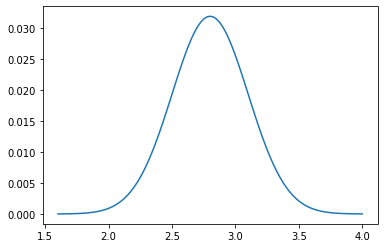

In [82]:
plt.plot(*zip(*sorted(bruins.items())))

In [26]:
test = MakePoissonPmf(3.5, 10)
print(test)

{0: 0.0301973834223185, 1: 0.10569084197811475, 2: 0.18495897346170082, 3: 0.21578546903865095, 4: 0.18881228540881959, 5: 0.1321685997861737, 6: 0.077098349875268, 7: 0.038549174937634, 8: 0.016865264035214874, 9: 0.006558713791472451, 10: 0.002295549827015358}


In [37]:
PmfNormalize(test)

0.9989806055623829

In [38]:
test

{0: 0.03022819787909564,
 1: 0.10579869257683473,
 2: 0.18514771200946079,
 3: 0.21600566401103757,
 4: 0.1890049560096579,
 5: 0.1323034692067605,
 6: 0.07717702370394364,
 7: 0.03858851185197182,
 8: 0.01688247393523767,
 9: 0.0065654065303702045,
 10: 0.002297892285629572}

That’s simple enough so far; the problem is that we don’t know the value of lam exactly. Instead, we have a distribution of possible values forlam.

For each value oflam, the distribution of goals is Poisson.  So the overalldistribution of goals is a mixture of these Poisson distributions, weightedaccording to the probabilities in the distribution oflam.

Given the posterior distribution oflam, here’s the code that makes the dis-tribution of goals:

In [ ]:
def MakeMixture(metapmf, name='mix'):
    """Make a mixture distribution.
    Args:
      metapmf: Pmf that maps from Pmfs to probs.
      name: string name for the new Pmf.
    Returns: Pmf object.
    """

    for pmf, p1 in metapmf.Items():
        for x, p2 in pmf.Items():
            mix.Incr(x, p1 * p2)
    return mix

For each value oflamwe make a Poisson Pmf and add it to the meta-Pmf. I call it a meta-Pmf because it is a Pmf that contains Pmfs as its values.

Then we useMakeMixtureto compute the mixture (we sawMakeMixtureinSection 5.6).

Figure  7.2  shows  the  resulting  distribution  of  goals  for  the  Bruins  andCanucks.   The Bruins are less likely to score 3 goals or fewer in the nextgame, and more likely to score 4 or more.

# Import Data

In [73]:
test = pd.read_csv('hockey_data.csv')
print(test)

      Season   Game Team  Pd1  Pd2  Pd3  OT  SO Win  Total
0       2009  20001  NYR    0    1    1   0       0      2
1       2009  20001  TBL    0    0    1   0       0      1
2       2009  20002  OTT    1    2    0   0       0      3
3       2009  20002  PIT    1    1    1   1       0      4
4       2009  20003  NYR    0    2    0   0       0      2
...      ...    ...  ...  ...  ...  ...  ..     ...    ...
9835    2012  21228  NSH    3    1    2   0       0      6
9836    2012  21229  EDM    0    0    0   0       0      0
9837    2012  21229  VAN    0    1    2   0       0      3
9838    2012  21230  LAK    1    1    0   0       0      2
9839    2012  21230  SJS    0    0    2   1       0      3

[9840 rows x 9 columns]


In [78]:
statistics.stdev(test[test['Team'] == "BOS"]['Total'])

1.8828367431178143